In [26]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
train_25_df = pd.read_csv('./util_lstm_train_abs_bs25.csv', index_col=0)
train_500_df = pd.read_csv('./util_lstm_train_abs_bs500.csv', index_col=0)
train_1000_df = pd.read_csv('./util_lstm_train_abs_bs1000.csv', index_col=0)
test_25_df = pd.read_csv('./util_lstm_test_abs_bs25.csv', index_col=0)
test_500_df = pd.read_csv('./util_lstm_test_abs_bs500.csv', index_col=0)
test_1000_df = pd.read_csv('./util_lstm_test_abs_bs1000.csv', index_col=0)
train_nl4_df = pd.read_csv('./util_lstm_train_no_tasks_nl4.csv', index_col=0)

In [3]:
train_500_df.head()

,actual cpu usage,actual mem usage,predicted cpu usage,predicted mem usage,allocated cpu,allocated mem,rmse,mae
0,773.050842,19.953011,632.179688,4.526217,400.0,10.000000,512.053752,269.263479
1,608.671021,14.726125,420.011261,9.537863,600.0,29.296875,512.053752,269.263479
2,608.102478,14.808974,420.011261,9.537863,600.0,29.296875,512.053752,269.263479
3,385.129120,14.586164,420.011261,9.537863,600.0,29.296875,512.053752,269.263479
4,614.094116,14.683479,420.011261,9.537863,600.0,29.296875,512.053752,269.263479


In [107]:
def plot_cpu(df: pd.DataFrame):
    df[['actual cpu usage', 'allocated cpu', 'predicted cpu usage']].plot.line(figsize=(30, 25))
    
    
cycler = plt.cycler(linestyle=['-', '-', '--', '-.', '--', '-', '--'],
                    color=['black', 'green', 'orange', 'blue', 'orange', 'green', 'green'],
)

def plot_df(df: DataFrame, df_columns: list, start_range: int = -1, end_range: int = -1, save_plot_path: str = None, y_label: str = ''):  # type: ignore
    if start_range == -1:
        start_range = 0
    if end_range == -1:
        end_range = len(df)
    fig, ax = plt.subplots()
    
    plt.xlabel('time step', fontsize=45)
    plt.ylabel(y_label, fontsize=45)
    
    ax.set_prop_cycle(cycler)
    plot = df[df_columns].iloc[start_range:end_range].plot.line(figsize=(50, 40), linewidth=6, fontsize=40, ax=ax)
    plt.legend(fontsize=40)
    if save_plot_path is not None:
        plot.figure.savefig(save_plot_path)


In [108]:
combined_train_df = pd.merge(train_500_df, train_1000_df[['predicted cpu usage', 'predicted mem usage', 'rmse', 'mae']], left_index=True, right_index=True)
combined_train_df.head()

,actual cpu usage,actual mem usage,predicted cpu usage_x,predicted mem usage_x,allocated cpu,allocated mem,rmse_x,mae_x,predicted cpu usage_y,predicted mem usage_y,rmse_y,mae_y
0,773.050842,19.953011,632.179688,4.526217,400.0,10.000000,512.053752,269.263479,54.203789,13.218224,508.090326,216.651046
1,608.671021,14.726125,420.011261,9.537863,600.0,29.296875,512.053752,269.263479,597.958618,15.549320,508.090326,216.651046
2,608.102478,14.808974,420.011261,9.537863,600.0,29.296875,512.053752,269.263479,597.958618,15.549320,508.090326,216.651046
3,385.129120,14.586164,420.011261,9.537863,600.0,29.296875,512.053752,269.263479,597.958618,15.549320,508.090326,216.651046
4,614.094116,14.683479,420.011261,9.537863,600.0,29.296875,512.053752,269.263479,597.958618,15.549320,508.090326,216.651046


In [109]:
cpu_columns: list = ['actual cpu usage', 'allocated cpu', 'predicted cpu usage_x', 'predicted cpu usage_y']
mem_columns: list = ['actual mem usage', 'allocated mem', 'predicted mem usage_x', 'predicted mem usage_y']

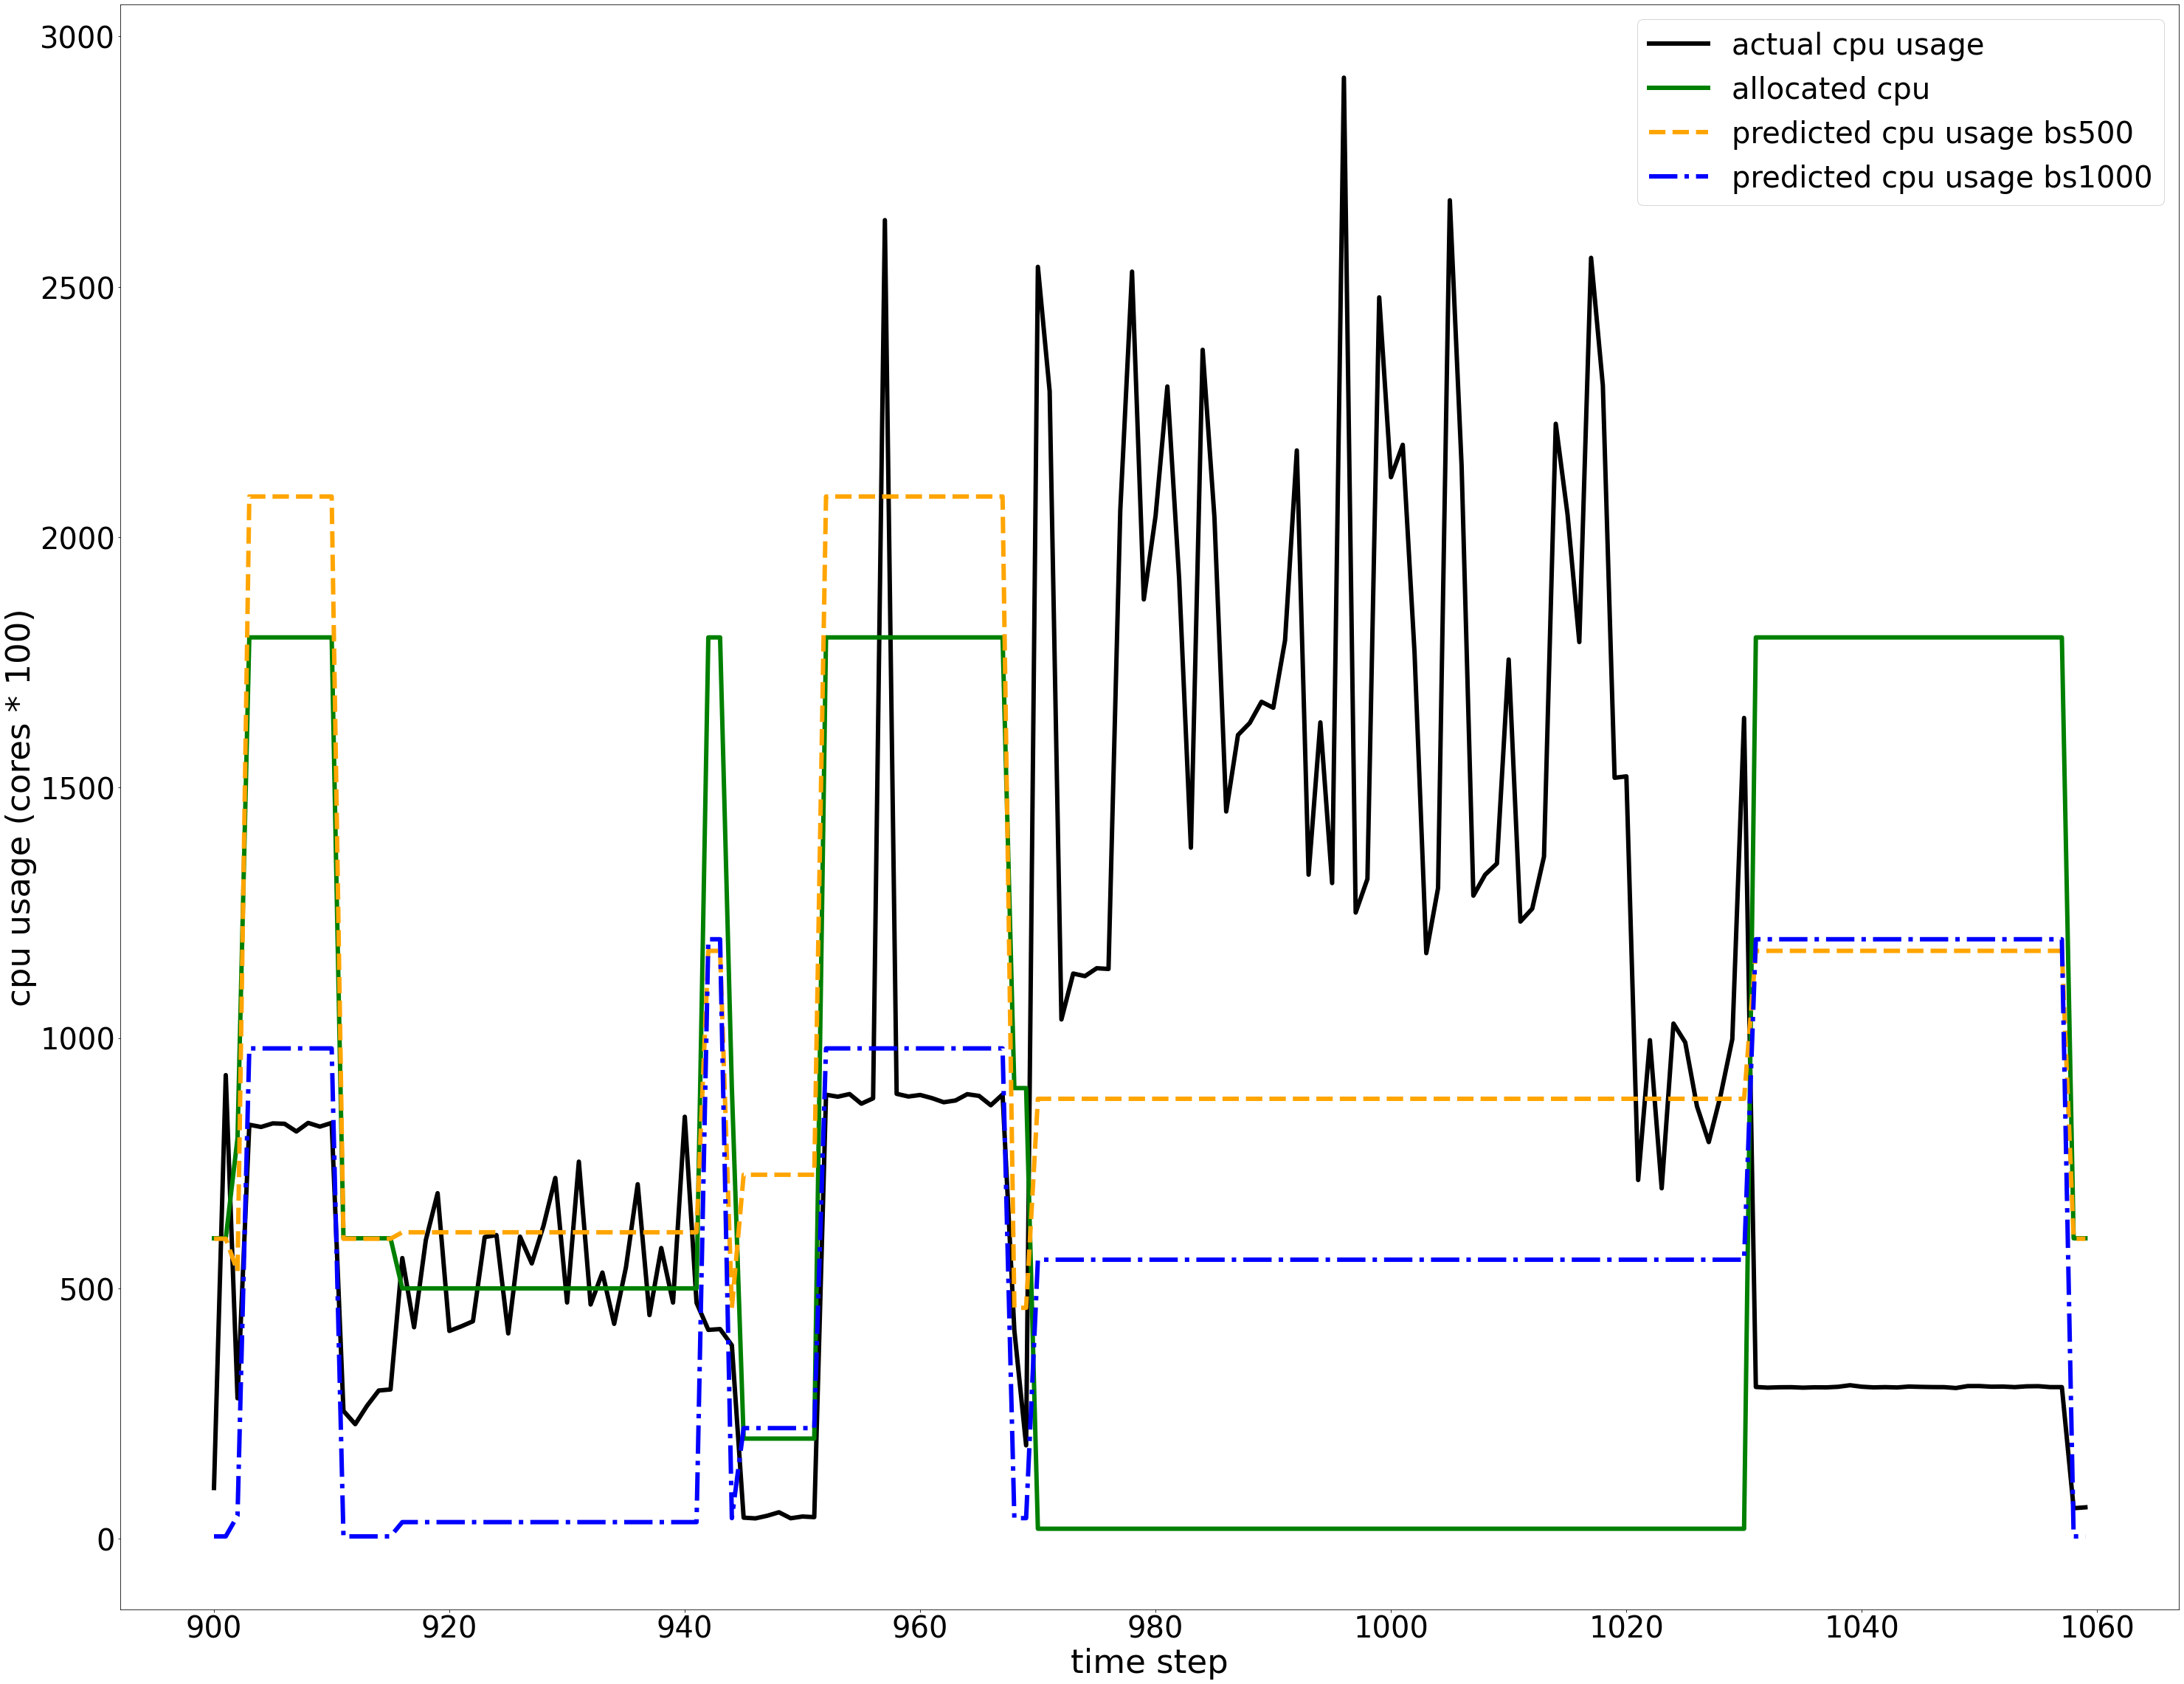

In [110]:
combined_train_df_cpu = combined_train_df[cpu_columns]
combined_train_df_cpu = combined_train_df_cpu.rename(columns={'predicted cpu usage_x': 'predicted cpu usage bs500', 'predicted cpu usage_y': 'predicted cpu usage bs1000'})
plot_df(combined_train_df_cpu, df_columns=['actual cpu usage', 'allocated cpu', 'predicted cpu usage bs500', 'predicted cpu usage bs1000'], start_range=900, end_range=1060, y_label='cpu usage (cores * 100)')

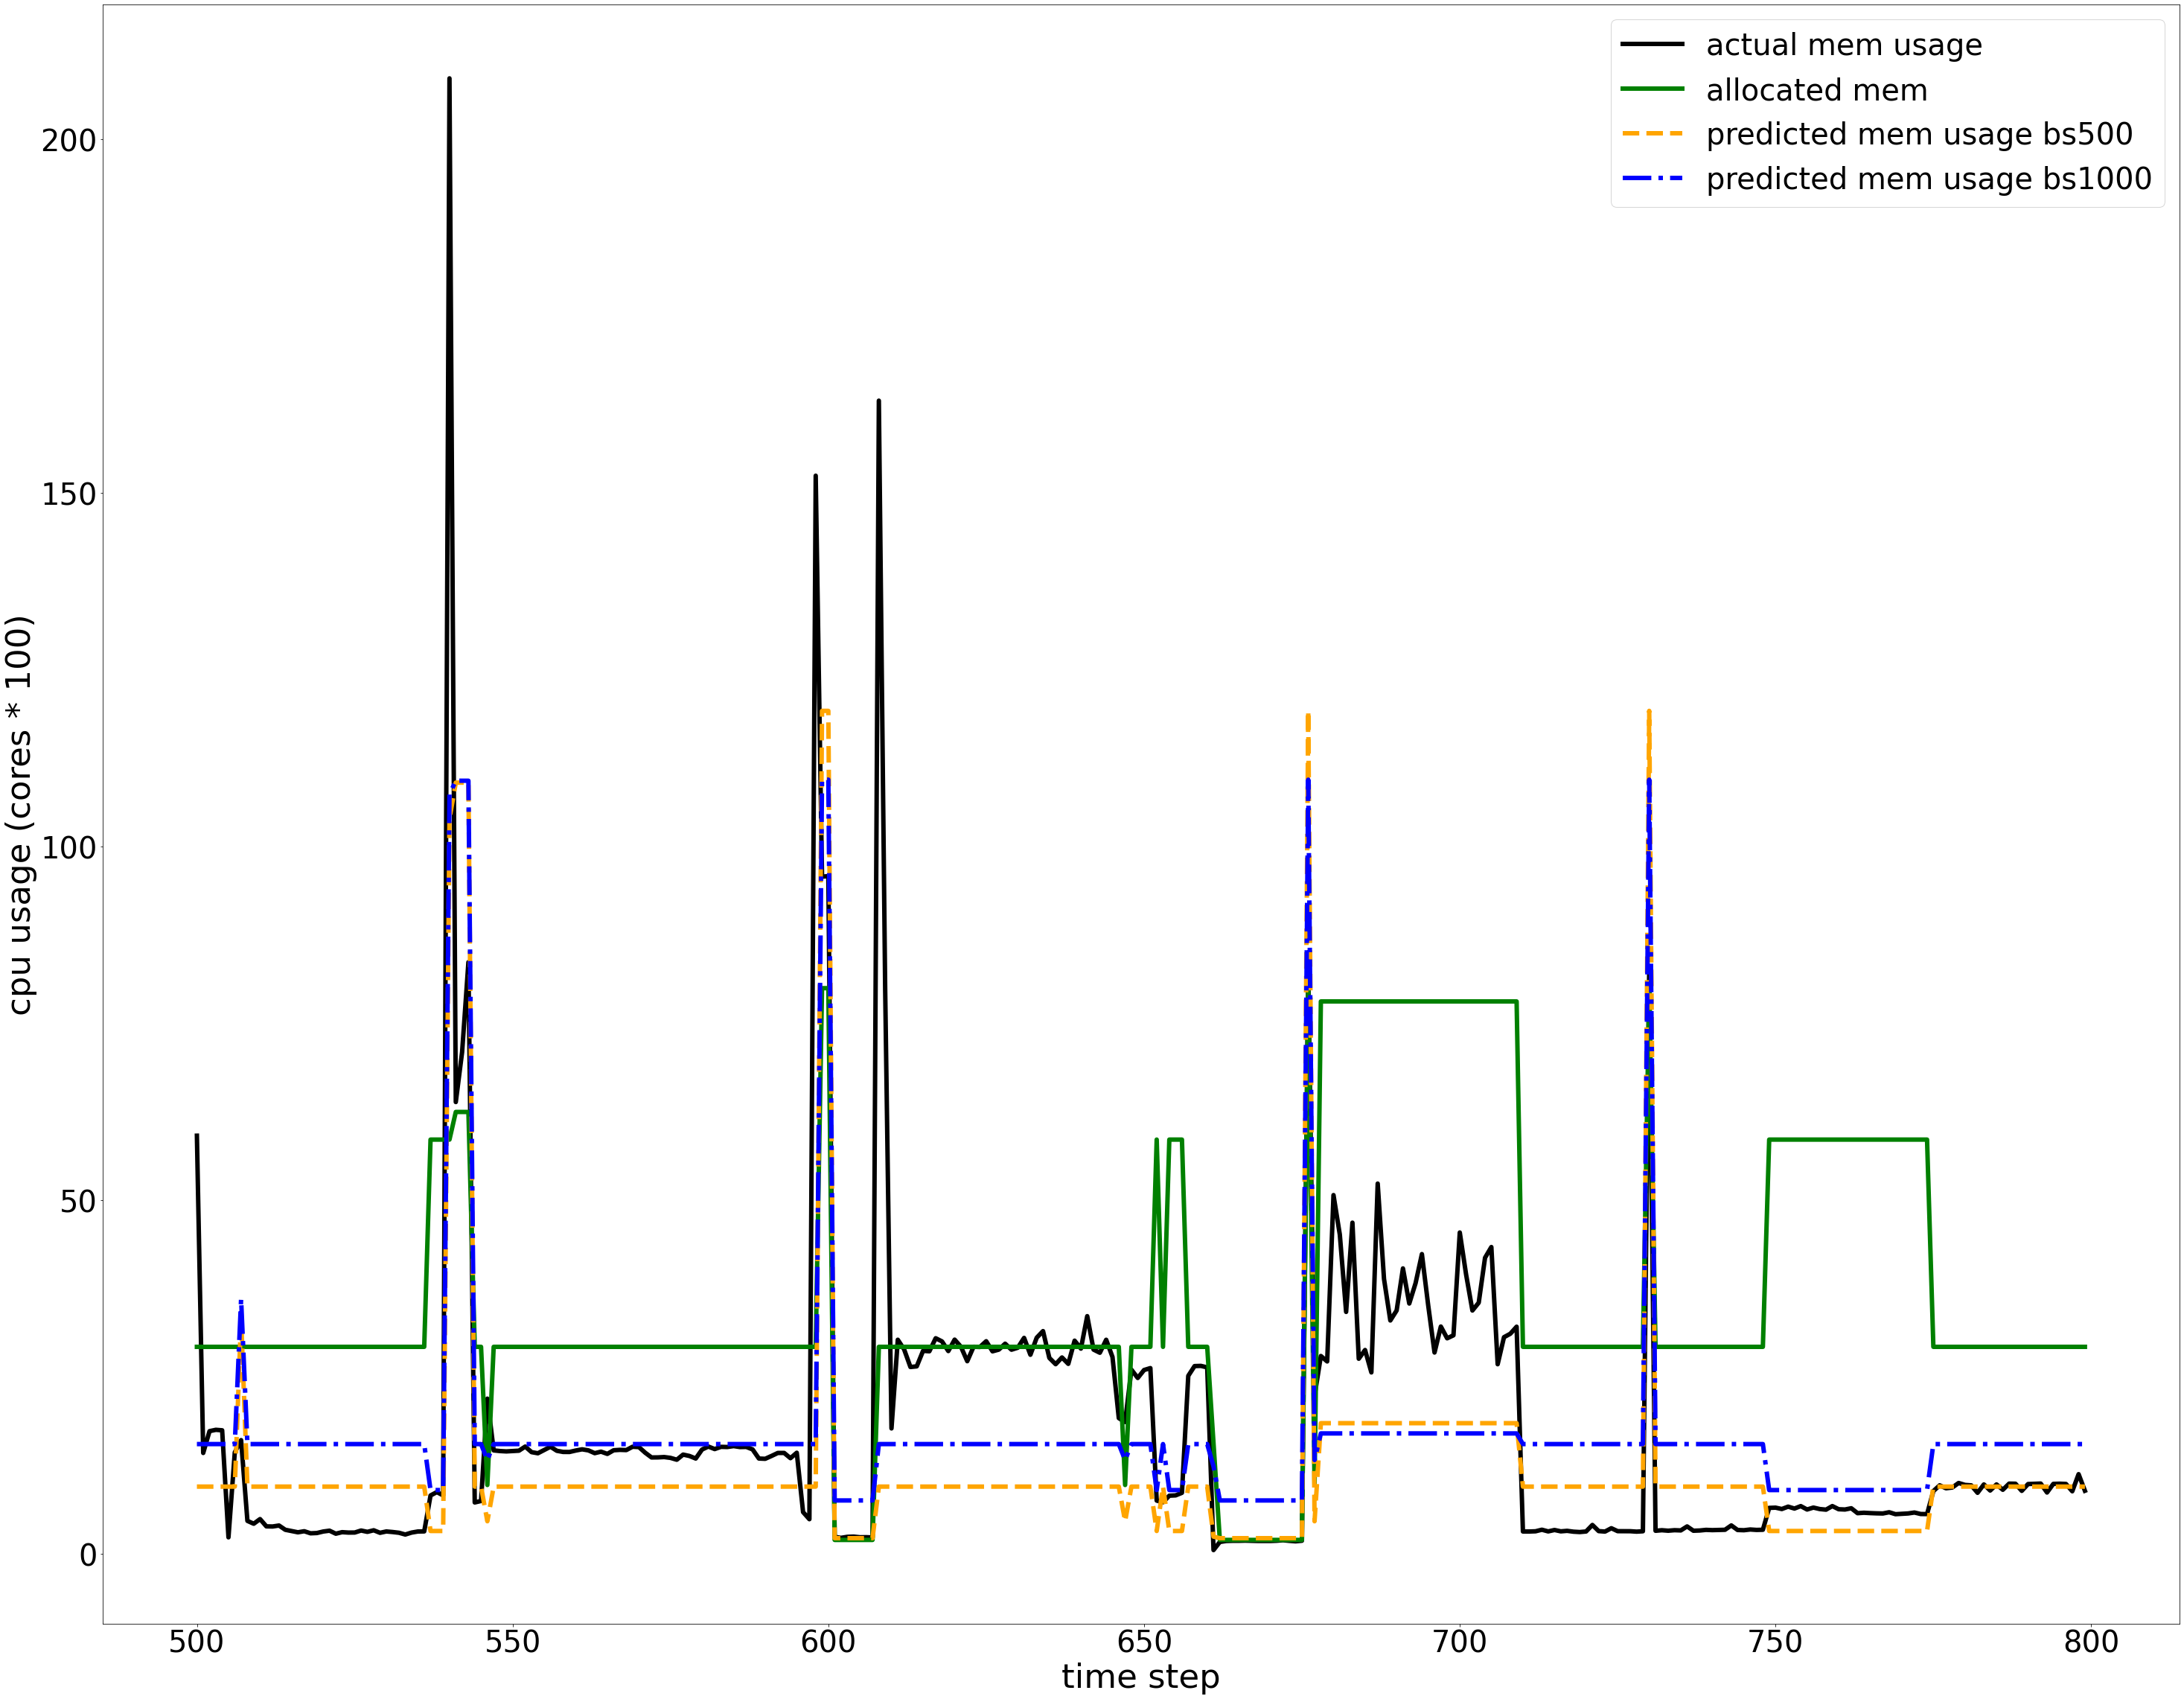

In [111]:
combined_train_df_mem = combined_train_df[mem_columns]
combined_train_df_mem = combined_train_df_mem.rename(columns={'predicted mem usage_x': 'predicted mem usage bs500', 'predicted mem usage_y': 'predicted mem usage bs1000'})
plot_df(combined_train_df_mem, df_columns=['actual mem usage', 'allocated mem', 'predicted mem usage bs500', 'predicted mem usage bs1000'], start_range=500, end_range=800, y_label='cpu usage (cores * 100)')

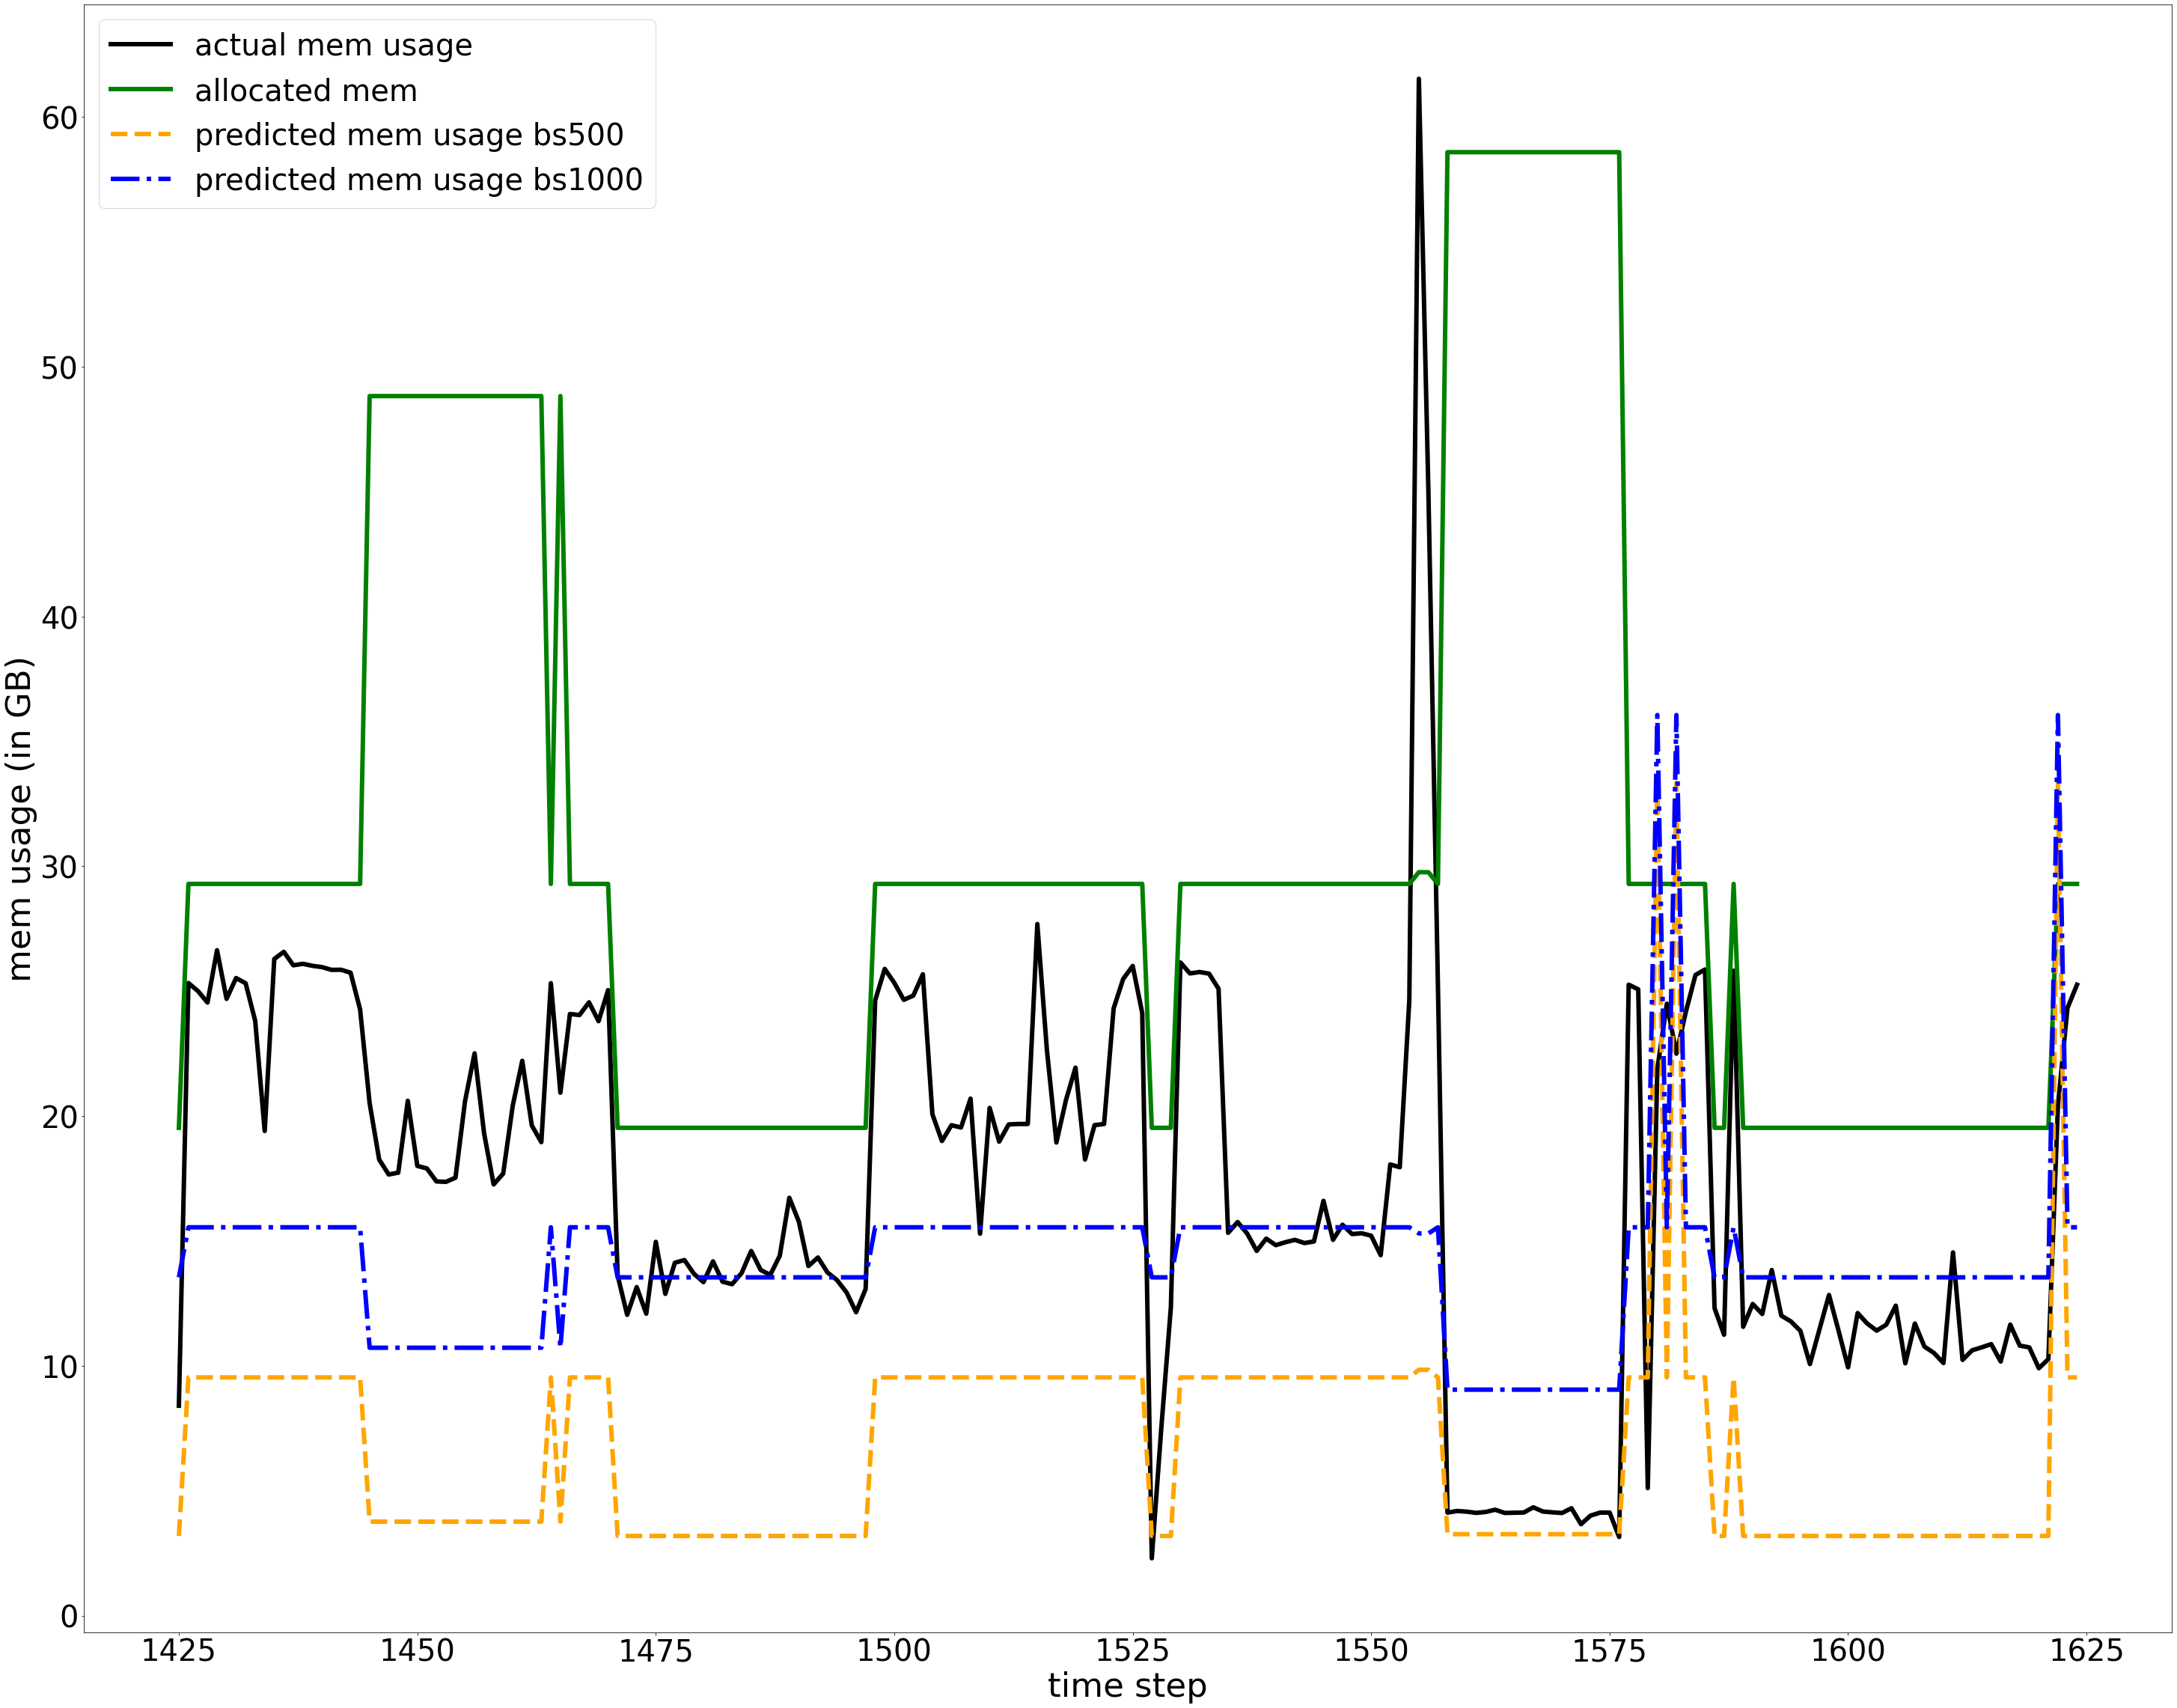

In [112]:
plot_df(combined_train_df_mem, df_columns=['actual mem usage', 'allocated mem', 'predicted mem usage bs500', 'predicted mem usage bs1000'], start_range=1425, end_range=1625, y_label='mem usage (in GB)')